In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm

from src.model_impl import ModelWrapper

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arspa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Evaluating: ms_base.pkl


100%|██████████| 29145/29145 [00:33<00:00, 862.84it/s] 


Evaluating: ms_strong_reg.pkl


100%|██████████| 29145/29145 [00:34<00:00, 838.71it/s] 


Evaluating: wcl_base.pkl


100%|██████████| 29145/29145 [03:01<00:00, 160.25it/s]


Evaluating: wcl_big_ngrams.pkl


100%|██████████| 29145/29145 [05:30<00:00, 88.06it/s] 


Evaluating: wcmsl_base.pkl


100%|██████████| 29145/29145 [04:41<00:00, 103.68it/s]


Evaluating: wcmsl_more_chars.pkl


100%|██████████| 29145/29145 [03:03<00:00, 158.44it/s]


Evaluating: wcmsl_more_words.pkl


100%|██████████| 29145/29145 [02:56<00:00, 165.57it/s]


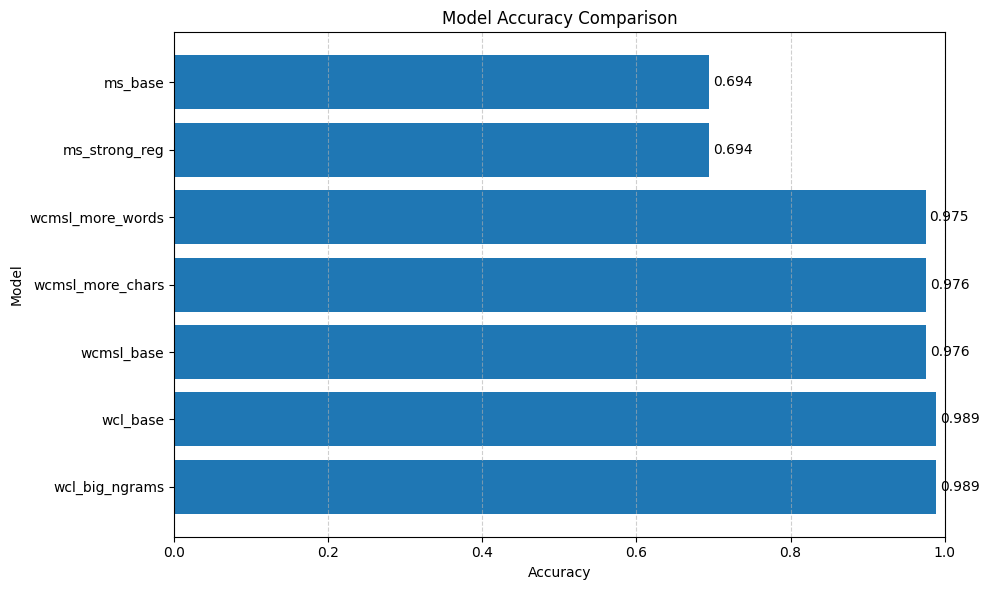

In [4]:
test_dataset = pd.read_csv(PROJECT_ROOT / "data" / "raw" / "Test_AI_Human.csv")

models = Path(PROJECT_ROOT / "src" / "models")

def plot_accuracy_bar(df: pd.DataFrame) -> None:
    plt.figure(figsize=(10, 6))

    plt.barh(df["model"], df["accuracy"])
    plt.xlabel("Accuracy")
    plt.ylabel("Model")
    plt.title("Model Accuracy Comparison")

    plt.xlim(0, 1)
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    for i, acc in enumerate(df["accuracy"]):
        plt.text(acc + 0.005, i, f"{acc:.3f}", va="center")

    plt.tight_layout()
    plt.show()
    
def check_model_accuracy(model: ModelWrapper, df: pd.DataFrame) -> float:
    all = len(df)
    correct = 0

    for _, row in tqdm(df.iterrows(), total=all):
        text, ai = row['text'], row['generated']
        prediction = model.predict(text).result

        prediction_test = "AI" if ai == 1 else "HUMAN"
        
        if prediction_test == prediction:
            correct += 1

    accuracy = correct / all
    return accuracy

results = []

for model_path in models.glob("*.pkl"):
    model = ModelWrapper()
    model.load(model_path)

    print(f"Evaluating: {model_path.name}")
    accuracy = check_model_accuracy(model, test_dataset)

    results.append({
        "model": model_path.stem,
        "accuracy": accuracy,
    })

metrics_df = pd.DataFrame(results).sort_values("accuracy", ascending=False)

plot_accuracy_bar(metrics_df)


Evaluating: ms_base.pkl


100%|██████████| 3000/3000 [00:03<00:00, 850.61it/s]


Evaluating: ms_strong_reg.pkl


100%|██████████| 3000/3000 [00:03<00:00, 890.15it/s]


Evaluating: wcl_base.pkl


100%|██████████| 3000/3000 [00:12<00:00, 232.43it/s]


Evaluating: wcl_big_ngrams.pkl


100%|██████████| 3000/3000 [00:18<00:00, 160.92it/s]


Evaluating: wcmsl_base.pkl


100%|██████████| 3000/3000 [00:15<00:00, 197.08it/s]


Evaluating: wcmsl_more_chars.pkl


100%|██████████| 3000/3000 [00:15<00:00, 188.32it/s]


Evaluating: wcmsl_more_words.pkl


100%|██████████| 3000/3000 [00:15<00:00, 198.62it/s]


Evaluating: wcmsl_more_words_finetuned.pkl


100%|██████████| 3000/3000 [00:14<00:00, 201.26it/s]


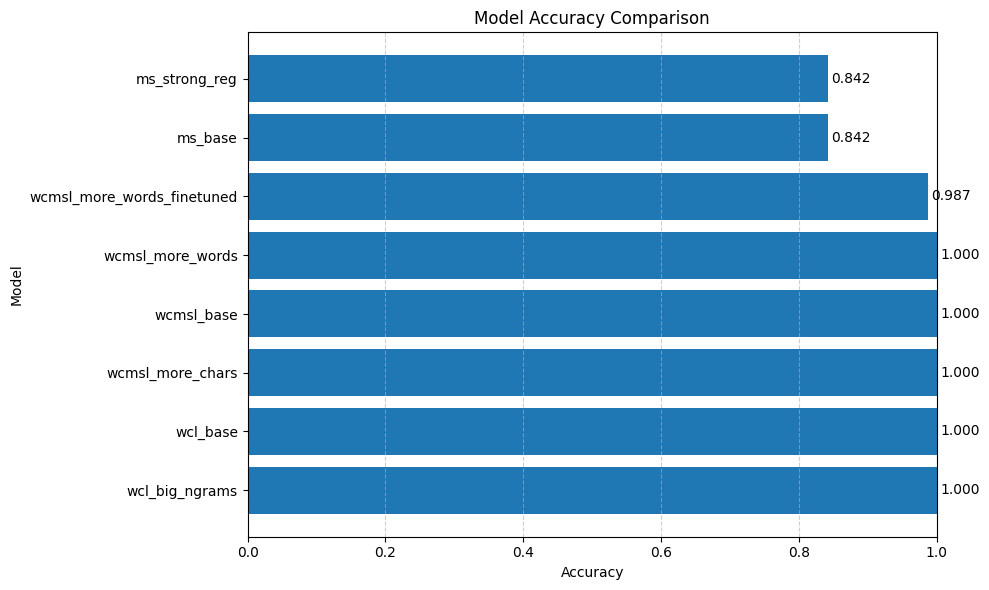

In [9]:
test_processed_dataset = pd.read_csv(PROJECT_ROOT / "data" / "processed" / "balanced_length_filtered_test_dataset.csv")

results = []

for model_path in models.glob("*.pkl"):
    model = ModelWrapper()
    model.load(model_path)

    print(f"Evaluating: {model_path.name}")
    accuracy = check_model_accuracy(model, test_processed_dataset)

    results.append({
        "model": model_path.stem,
        "accuracy": accuracy,
    })

metrics_df = pd.DataFrame(results).sort_values("accuracy", ascending=False)

plot_accuracy_bar(metrics_df)

Evaluating: wcmsl_more_words_finetuned.pkl


100%|██████████| 29145/29145 [05:04<00:00, 95.61it/s] 


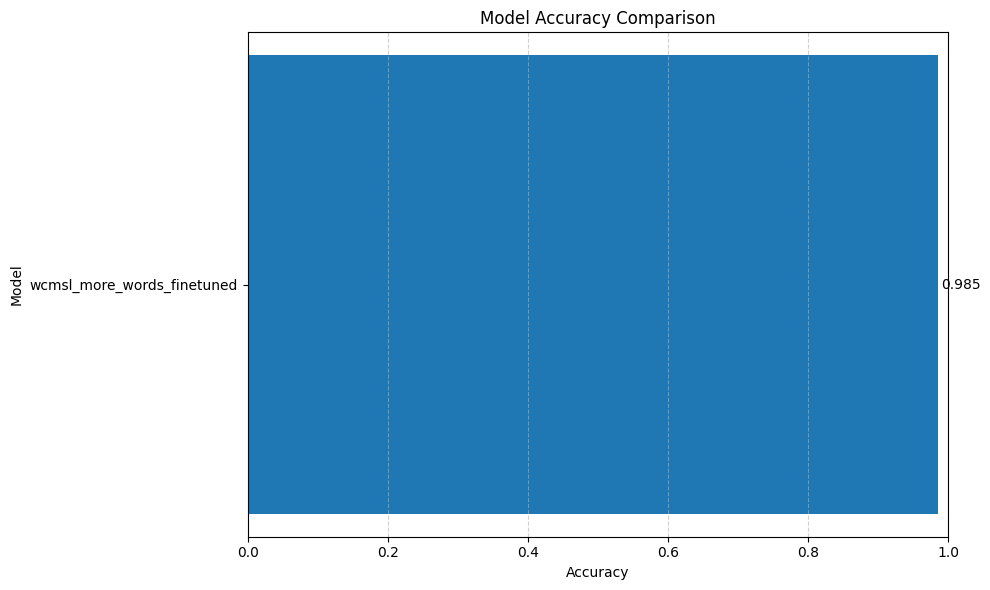

In [10]:


results = []

for model_path in models.glob("wcmsl_more_words_finetuned.pkl"):
    model = ModelWrapper()
    model.load(model_path)

    print(f"Evaluating: {model_path.name}")
    accuracy = check_model_accuracy(model, test_dataset)

    results.append({
        "model": model_path.stem,
        "accuracy": accuracy,
    })

metrics_df = pd.DataFrame(results).sort_values("accuracy", ascending=False)

plot_accuracy_bar(metrics_df)
